<a href="https://colab.research.google.com/github/Mouli1704/Innomatics_Hackathon_31-08-2024/blob/main/Handwritten_Digits_Recognition_03Nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digits Recognition
--`MNIST DATABASE`

In [ ]:
### Import key libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import math
import datetime
import platform

C:\Users\think\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Load the data
The **training** dataset consists of `60,000` having dimension `28x28px` images of hand-written digits from `0` to `9`.

The **test** dataset consists of `10,000` `28x28px` images.

In [ ]:
print('test dataset % is', 10000/70000*100)

test dataset % is 14.285714285714285


### RECOMMENDED PLATFORM TO DOWNLOAD `MNIST` dataset
https://www.tensorflow.org/datasets/catalog/mnist

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data() #arrays

![image.png](attachment:image.png)

### Link for the MNIST Database
https://paperswithcode.com/dataset/mnist

### Benchmarking of different algorithms and their respective error

https://yann.lecun.com/exdb/mnist/

-- `PLEASE BE CAREFUL TO CLICK/OPEN THE LINK - DO IT IN INCOGNITO MODE`

![image.png](attachment:image.png)

In [ ]:
print('Type of x_train:', type(x_train))
print('Dimension of the array x_train:', x_train.ndim)

Type of x_train: <class 'numpy.ndarray'>
Dimension of the array x_train: 3


In [ ]:
print('x_train:', x_train.shape)

x_train: (60000, 28, 28)


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (60000, 28, 28)
y_train (60000,)
x_test (10000, 28, 28)
y_test (10000,)


![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Let us explore the data a bit more

In [ ]:
pd.DataFrame(x_train[7]) # just one digit

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,253,174,6,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,43,...,252,252,252,158,14,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,178,...,252,252,252,252,59,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,109,...,252,252,252,252,59,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,226,252,252,172,7,0,0,0,0,0


### Plotting the matrix of numbers

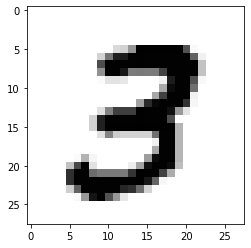

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap=plt.cm.binary)
plt.show()

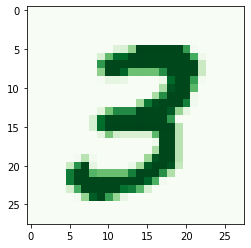

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap='Greens')
plt.show()

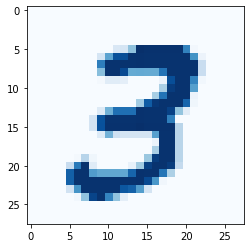

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap='Blues')
plt.show()

#### `plt.imshow()` - function shows the pixel density

In [ ]:
math.sqrt(18)

4.242640687119285

In [ ]:
n=18
num_cells = math.ceil(math.sqrt(n)) #ceiling means take the higher perfect square number
print(num_cells)

5


### Plot top `25 or 16` images from the training dataset

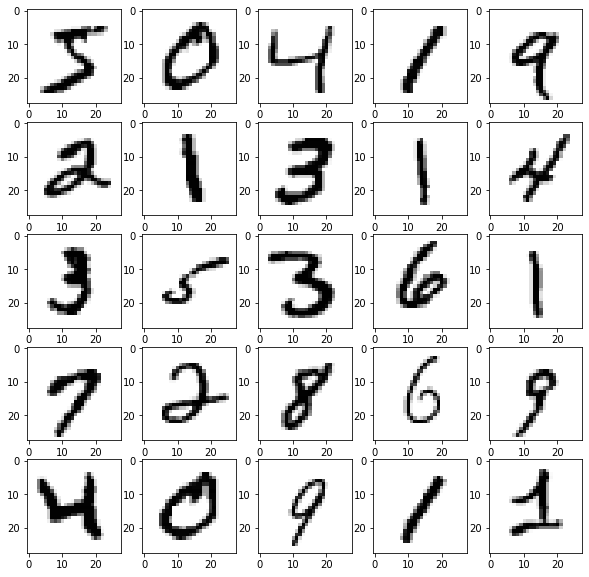

In [ ]:
n=18
num_cells = math.ceil(math.sqrt(n))
plt.figure(figsize=(10,10))

for i in range(num_cells*num_cells):
    plt.subplot(num_cells, num_cells, i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

![image.png](attachment:image.png)

In [ ]:
n=18
num_cells = math.floor(math.sqrt(n))

In [ ]:
num_cells

4

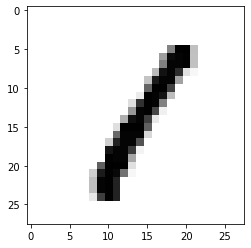

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.show()

### Let us normalize the data (`move range from **[0-255]** to [0-1])`

In [ ]:
x_train_normalized = x_train/255
x_test_normalized = x_test/255

In [ ]:
x_train_normalized.min(), x_train_normalized.max()

(0.0, 1.0)

In [ ]:
x_test_normalized.min(), x_test_normalized.max()

(0.0, 1.0)

### Before normalization

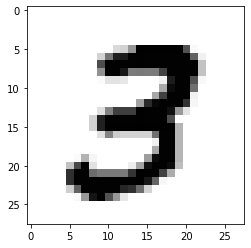

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train[7], cmap=plt.cm.binary) #before train
plt.show()

### After normalization

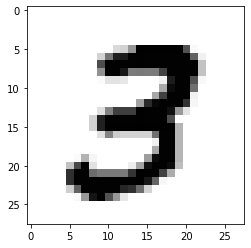

In [ ]:
plt.figsize = (6,6)
plt.imshow(x_train_normalized[7], cmap=plt.cm.binary) #after train
plt.show()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Let us build the model

# Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. `Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).`


#### Two activation functions - `ReLU` and `Softmax`

In [ ]:
model = tf.keras.models.Sequential() #gives you linear stack of layers - sequential --> meaning each layer output is input to the next layer

### Input Layer
model.add(tf.keras.layers.Flatten(input_shape = x_train_normalized.shape[1:])) #converts n-dimensional array to 1-D vector using flatten
model.add(tf.keras.layers.Dense(
    units=128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

### Hidden Layer -> Only ONE Hidden layer
model.add(tf.keras.layers.Dense(
    units=128,
    activation = tf.keras.activations.relu,
    kernel_regularizer = tf.keras.regularizers.l2(0.002)
))

### Output Layer
model.add(tf.keras.layers.Dense(
    units=10,
    activation = tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print('Number of weights between input features and input neurons', 784*128)
print('Number of weights between input neurons and hidden layer', 128*128)
print('Number of weight between hidden layer and output layer', 128*10)

Number of weights between input features and input neurons 100352
Number of weights between input neurons and hidden layer 16384
Number of weight between hidden layer and output layer 1280


In [ ]:
print('Number of total weights across the NN architecture:',100352 +16384+1280)

Number of total weights across the NN architecture: 118016


In [ ]:
print('Number of biases between input features and input neurons', 128)
print('Number of biases between input neurons and hidden layer', 128)
print('Number of biases between hidden layer and output layer', 10)

Number of biases between input features and input neurons 128
Number of biases between input neurons and hidden layer 128
Number of biases between hidden layer and output layer 10


In [ ]:
print('Number of total biases across the NN architecture:',128+128+10)

Number of total biases across the NN architecture: 266


In [ ]:
print('Number of total trainable parameters across the NN architecture:',118016+266)

Number of total trainable parameters across the NN architecture: 118282


**Param #** - column `param #` shows number of parameters (weights & biases) in each layer* which is used for learning during training*


## Compile the model

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
optimizer=adam_optimizer,
loss= tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy']) #default batchsize is 32 which is standard

## Train the model

In [ ]:
training_hist = model.fit(
x_train_normalized, y_train, epochs=10, validation_data=(x_test_normalized, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5196 - accuracy: 0.9226 - val_loss: 0.3294 - val_accuracy: 0.9501
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3003 - accuracy: 0.9550 - val_loss: 0.2677 - val_accuracy: 0.9587
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9602 - val_loss: 0.2288 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2369 - accuracy: 0.9642 - val_loss: 0.2719 - val_accuracy: 0.9506
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2232 - accuracy: 0.9653 - val_loss: 0.2185 - val_accuracy: 0.9655
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2117 - accuracy: 0.9669 - val_loss: 0.1934 - val_accuracy: 0.9698
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2047 - accuracy: 0.9674 - val_loss: 0.2011 - val_accuracy:

## Plot the accuracy and loss function charts against # epochs

`for refrence`
![image.png](attachment:image.png)

# Tasks for the next session

Step #1: Write the module for taking input as a handwritten digit and convert it into the desirable array form

Step #2: Use the trained model (basis 60,000 images of handwritten digits) to predit the digit you just took as input